<h2>Relis R code analysis</h2>

<h4><u>Parsing and beautifing data</u></h4>

In [1]:
# Install and load the necessary packages
packgs <- c("tidyverse", "qdapRegex", "data.table", "janitor", "dplyr", "ggplot2", "cowplot", "psych")
install.packages(setdiff(packgs, unique(data.frame(installed.packages())$Package)))
lapply(packgs, library, character.only = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘qdapRegex’


The following object is masked from ‘package:dplyr’:

    explain


The following object is masked from ‘package:ggplot2’:

    %+%



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package

[[1]]
 [1] "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "qdapRegex" "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "data.table" "qdapRegex"  "lubridate"  "forcats"    "stringr"   
 [6] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[11] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[16] "utils"      "datasets"   "methods"    "base"      

[[4]]
 [1] "janitor"    "data.table" "qdapRegex"  "lubridate"  "forcats"   
 [6] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[11] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[16] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[5]]
 [1] "janitor"    "data.table" "qdapRegex"  "lubridate"  "forcats"   
 [6] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[11] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[16] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[6]]
 [1] "janitor"    "data.table" "qdapRegex"  "lubridate"  "forcats"   
 [6] "stringr"    "dplyr"      "purrr"      "readr"      "tidyr"     
[11] "tibble"     "ggplot2"    "tidyverse"  "stats"      "graphics"  
[16] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[7]]
 [1] "cowplot"    "janitor"    "data.table" "qdapRegex"  "lubridate" 
 [6] "forcats"    "stringr"    "dplyr"      "purrr"      "readr"     
[11] "tidyr"      "tibble"     "ggplot2"    "tidyverse"  "stats"     
[16] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[21] "base"      

[[8]]
 [1] "psych"      "cowplot"    "janitor"    "data.table" "qdapRegex" 
 [6] "lubridate"  "forcats"    "stringr"    "dplyr"      "purrr"     
[11] "readr"      "tidyr"      "tibble"     "ggplot2"    "tidyverse" 
[16] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[21] "methods"    "base"

In [2]:
# Importing data.csv
relis_data <- read.csv("../data/relis_classification_CV.csv", header = TRUE) # Replace this with the name of your imported data file
print(relis_data)

  nbr Key Title Publication.year Author.s Venue Source Search.Type Reviewer.s
1   1  NA    NA             2016       NA    NA     NA          NA         NA
2   2  NA    NA             2018       NA    NA     NA          NA         NA
3   3  NA    NA             2016       NA    NA     NA          NA         NA
4   4  NA    NA             2016       NA    NA     NA          NA         NA
5   5  NA    NA             2019       NA    NA     NA          NA         NA
6   6  NA    NA             2016       NA    NA     NA          NA         NA
7   7  NA    NA             2017       NA    NA     NA          NA         NA
8 943  NA    NA             2016       NA    NA     NA          NA         NA
            Transformation.name                  Domain Transformation.Language
1 Model-Driven Data Migration 2 Artificial Intelligence           ATL | Henshin
2                         Test1    Collaborative system                 Henshin
3                        testtt    Collaborative system   

In [3]:
## Config file
# Beautifying Title
config_file <- data.frame(
    Column_name = c("Transformation.name", "Domain", "Transformation.Language", "Source.language", "Target.language", "Scope", "Industrial", "Bidirectional", "Targeted.year", "Note", "Publication.year", "Venue", "Search.Type"),
    Scale = c("Text", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Nominal", "Continuous", "Text", "Continuous", "Nominal", "Nominal")
)
print(config_file)

               Column_name      Scale
1      Transformation.name       Text
2                   Domain    Nominal
3  Transformation.Language    Nominal
4          Source.language    Nominal
5          Target.language    Nominal
6                    Scope    Nominal
7               Industrial    Nominal
8            Bidirectional    Nominal
9            Targeted.year Continuous
10                    Note       Text
11        Publication.year Continuous
12                   Venue    Nominal
13             Search.Type    Nominal


In [4]:
# Split config file based on data type
nominal_df <- subset(config_file, Scale == "Nominal")
continuous_df <- subset(config_file, Scale == "Continuous")
print(nominal_df)
print(continuous_df)

               Column_name   Scale
2                   Domain Nominal
3  Transformation.Language Nominal
4          Source.language Nominal
5          Target.language Nominal
6                    Scope Nominal
7               Industrial Nominal
8            Bidirectional Nominal
12                   Venue Nominal
13             Search.Type Nominal
        Column_name      Scale
9     Targeted.year Continuous
11 Publication.year Continuous


<h4><u>DESCRIPTIVE STATS</u></h4>

<h5 style="color:orange">Functions<h5>

In [5]:
# Function to extract current column and organize data
beautify_data_desc <- function(data, config_file, i) {
    # Split the values by the "|" character
    split_values <- str_split(data[[config_file$Column_name[i]]], "\\|")
    # Flatten the split values into a single vector and remove leading and trailing whitespaces
    flattened_values <- str_trim(unlist(split_values))

    # Generate the frequency table
    table_to_add <- tabyl(flattened_values)

    table_to_add["percent"] <- lapply(table_to_add["percent"], function(x) x * 100)
    colnames(table_to_add) <- c("Value", "n", "Percentage")

    return(table_to_add)
}

beautify_data_desc_cont <- function(data, config_file, i) {
    table_to_add <- data[, config_file$Column_name[i]]
    table_to_add <- data.frame(data = table_to_add)

    return(table_to_add)
}

# Function to generate bar plots
generate_bar_plot <- function(data, config_file, i) {
    table_to_add <- beautify_data_desc(data, config_file, i)
    p <- ggplot(data = table_to_add, aes(x = Value, y = Percentage, fill = n)) +
        geom_bar(stat = "identity") +
        labs(title = paste(nominal_df$Column_name[i], "~ Bar plot"), x = config_file$Title[i], y = "Percentage") +
        theme_minimal()

    return(p)
}

# Function to generate box plots
generate_box_plot <- function(data, config_file, i) {
    table_to_add <- beautify_data_desc_cont(data, config_file, i)
 
    p <- ggplot(table_to_add, aes(x = "x", y = data)) +
        geom_boxplot() +
        stat_summary(fun = "mean", geom = "point", shape = 8, size = 2, color = "red") +
        labs(title = paste(config_file$Title[[i]], "~ Box plot"), y = config_file$Title[[i]], x = "") +
        theme_minimal()

    return(p)
}

# Function to generate violin plots
generate_violin_plot <- function(data, config_file, i) {
    table_to_add <- beautify_data_desc_cont(data, config_file, i)
    print(data)
    p <- ggplot(table_to_add, aes(x = "x", y = data)) +
        geom_violin() +
        stat_summary(fun = "mean", geom = "point", shape = 8, size = 2, color = "red") +
        labs(title = paste(config_file$Title[[i]], "~ Violin plot"), y = config_file$Title[[i]], x = "") +
        theme_minimal()

    return(p)
}

<h5 style="color:#F0F8FF">Execution<h5>

In [6]:
# Initialize lists to store frequency tables and bar plots for nominal data
desc_distr_vector <- list()

# Generate frequency table and bar plot for each variable
for (i in 1:nrow(nominal_df)) {
    # Frequency table
    desc_distr_vector[[nominal_df$Column_name[i]]] <- beautify_data_desc(relis_data, nominal_df, i)
}

print(desc_distr_vector)


$Domain
                   Value n Percentage
                         1       12.5
 Artificial Intelligence 2       25.0
    Collaborative system 3       37.5
             Compilation 2       25.0

$Transformation.Language
   Value n Percentage
         1         10
     ATL 2         20
 Henshin 5         50
   MoTiF 1         10
     QVT 1         10

$Source.language
 Value n Percentage
       1       12.5
   DSL 2       25.0
  Java 2       25.0
 SySML 2       25.0
   UML 1       12.5

$Target.language
 Value n Percentage
       1       12.5
   DSL 1       12.5
  Java 5       62.5
   UML 1       12.5

$Scope
     Value n Percentage
           1   11.11111
 Exogenous 2   22.22222
   Inplace 4   44.44444
  Outplace 2   22.22222

$Industrial
 Value n Percentage
       1       12.5
    No 3       37.5
   Yes 4       50.0

$Bidirectional
 Value n Percentage
       1       12.5
    No 2       25.0
   Yes 5       62.5

$Venue
 Value n Percentage NA
  <NA> 8        100 NA

$Search.Type
 Va

$Domain

$Transformation.Language


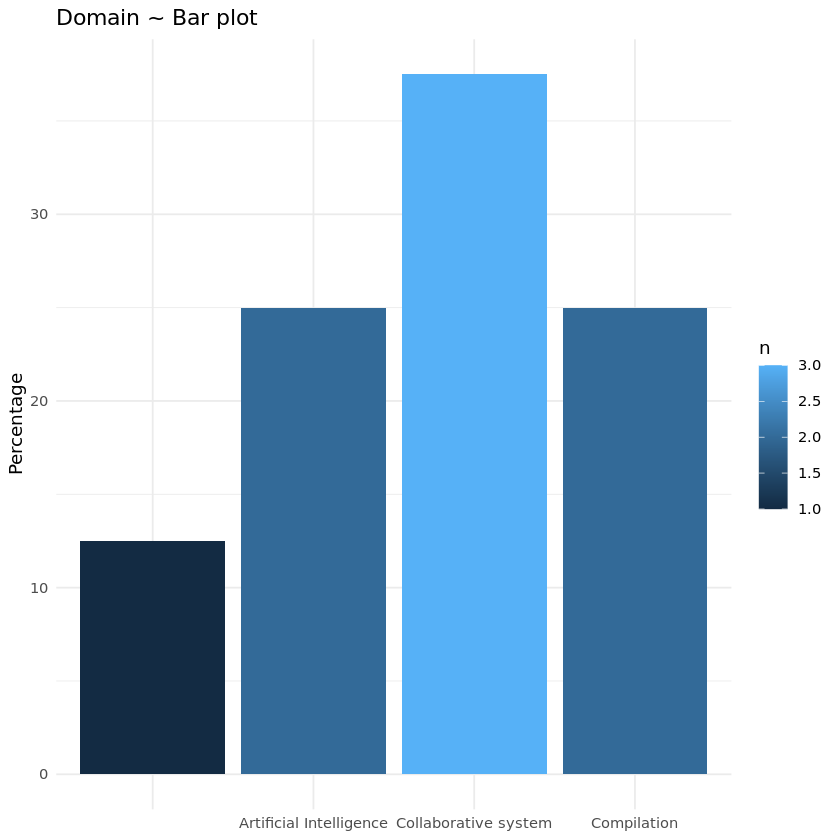


$Source.language


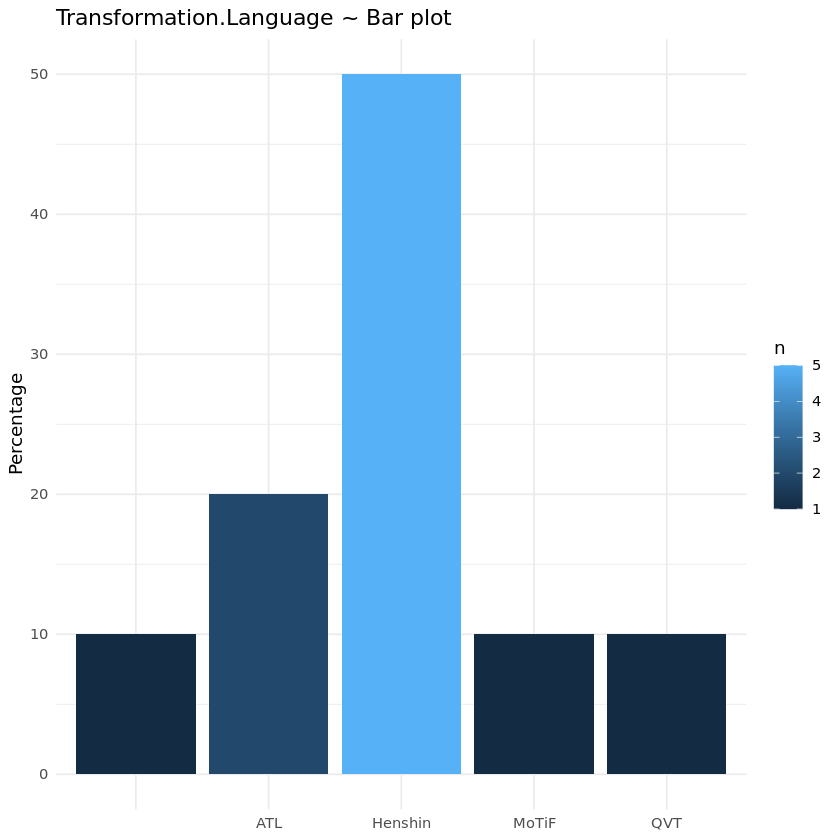


$Target.language


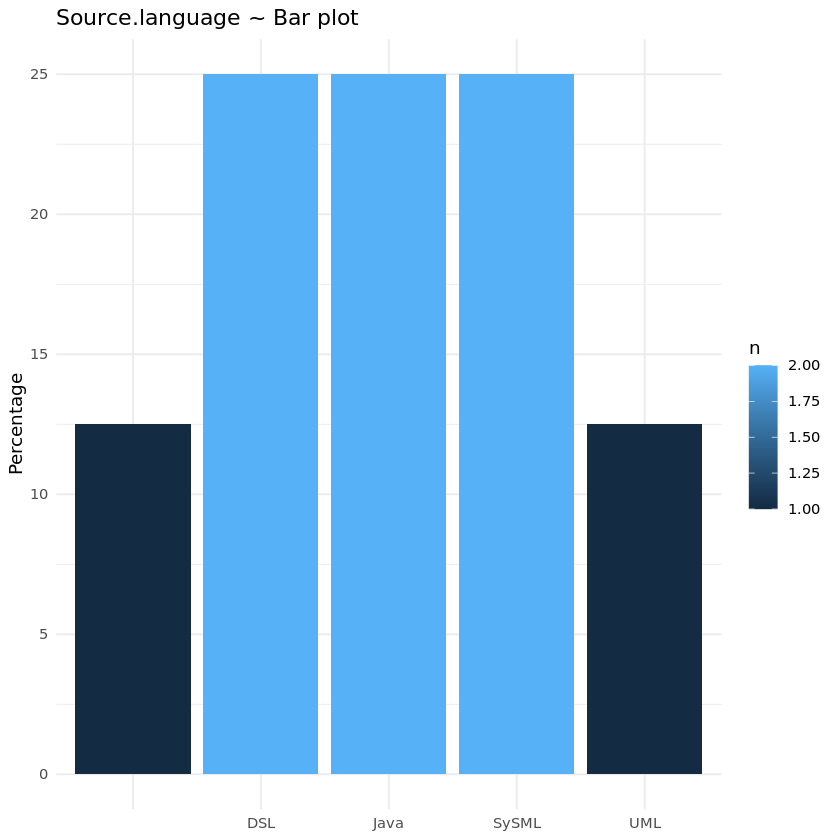


$Scope


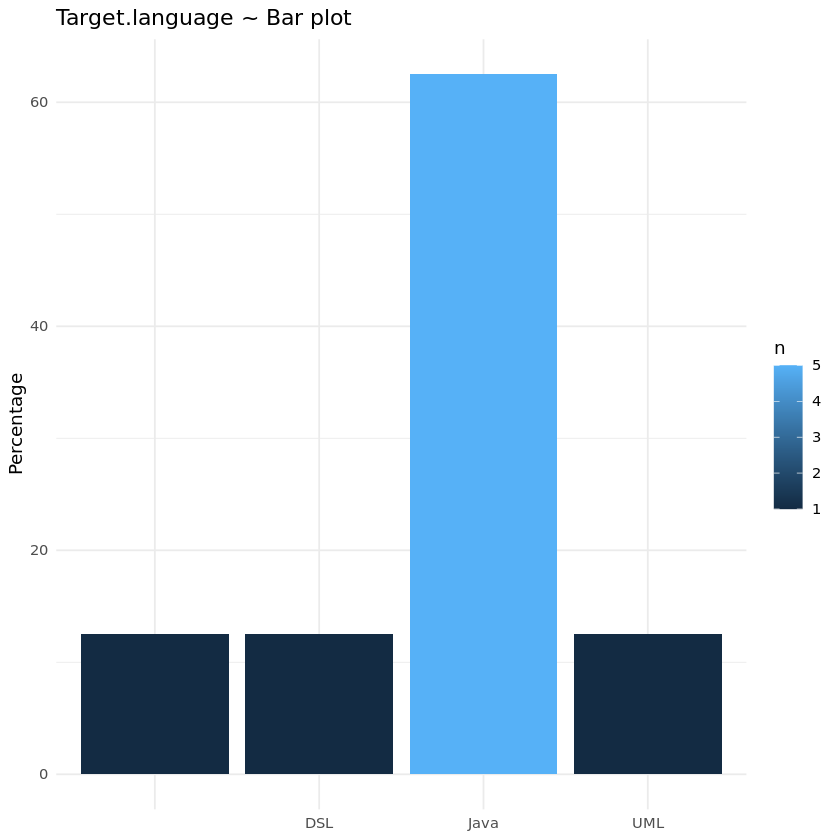


$Industrial


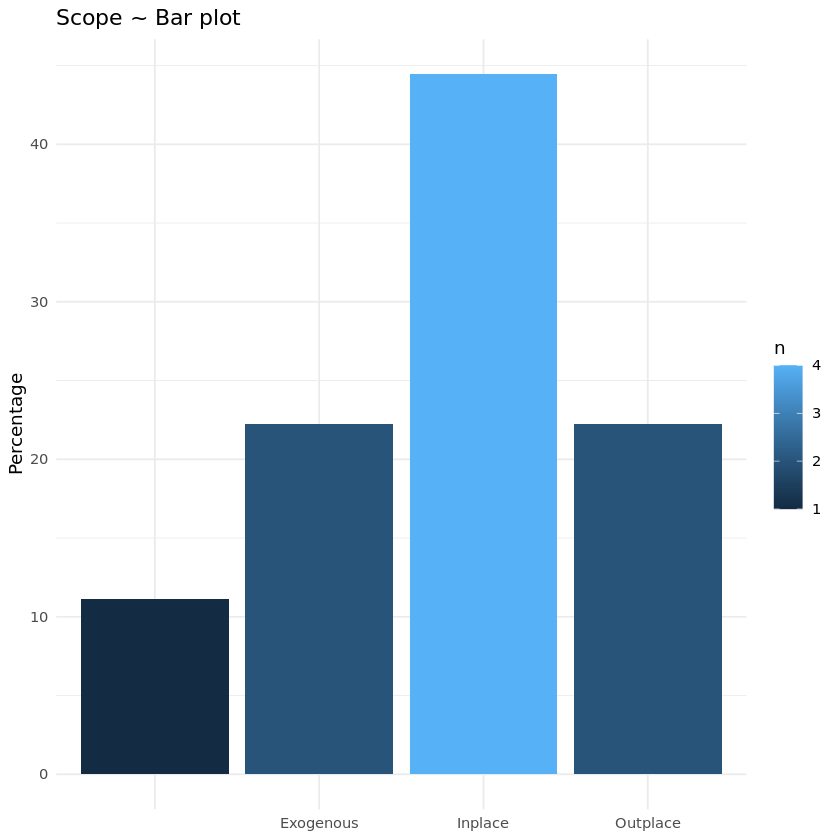


$Bidirectional


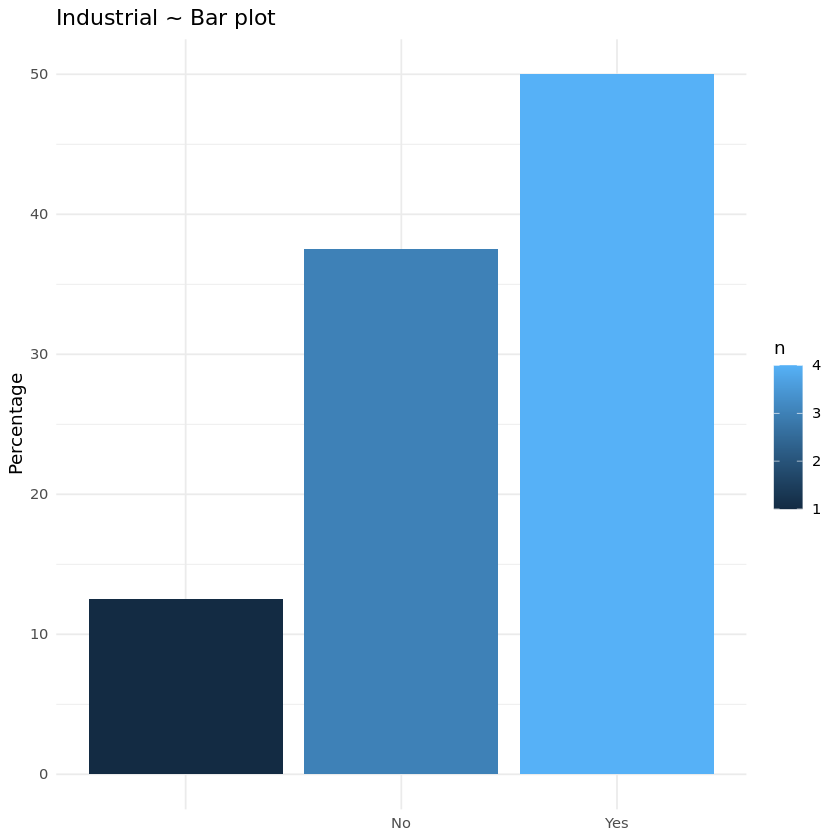


$Venue


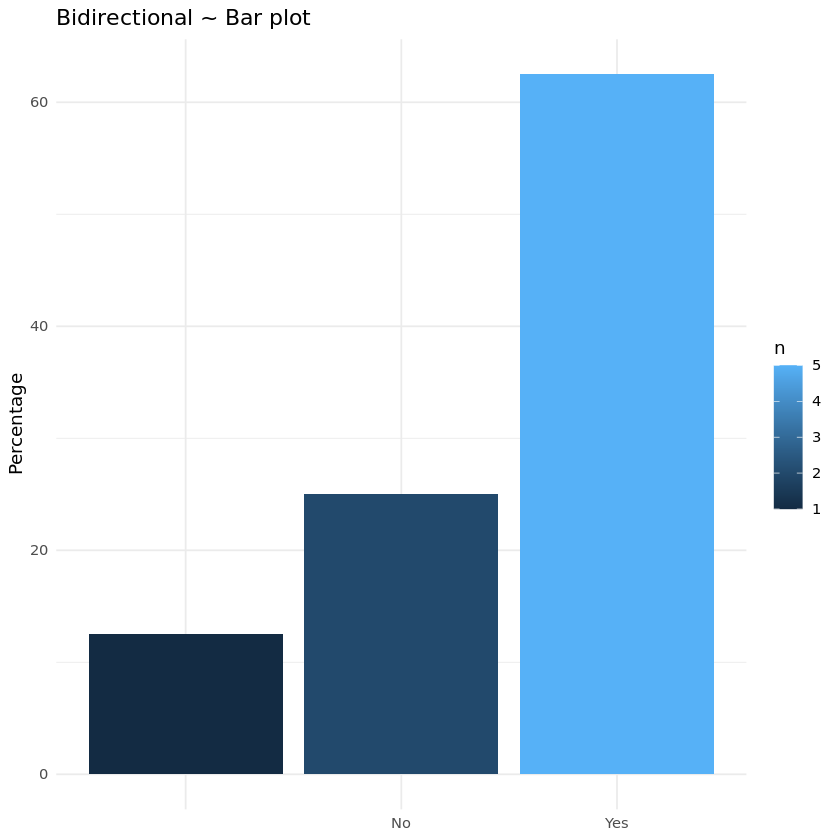


$Search.Type


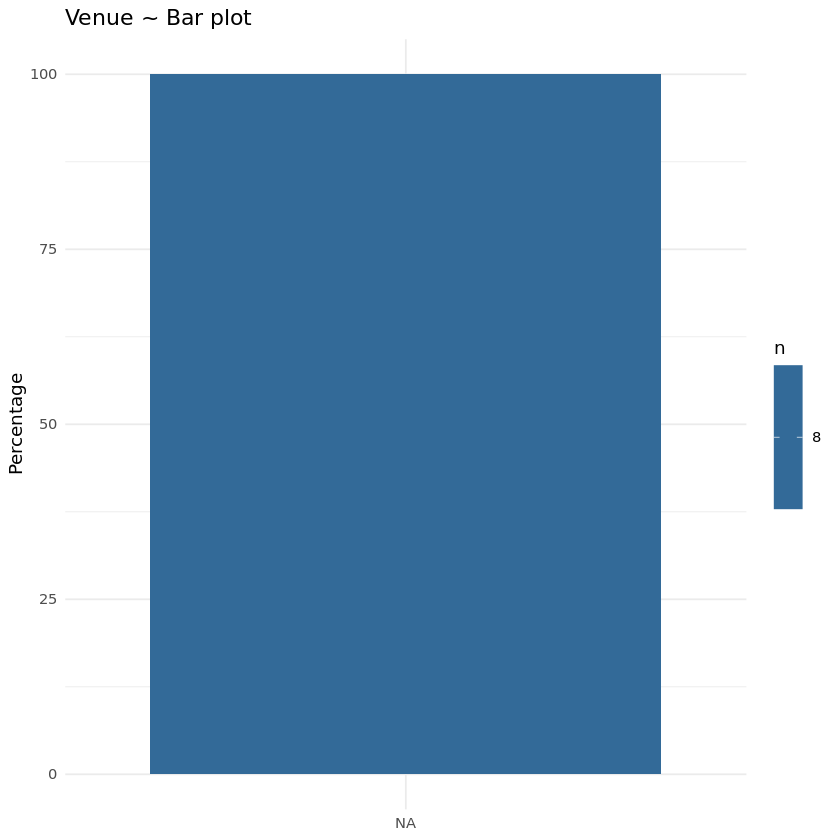

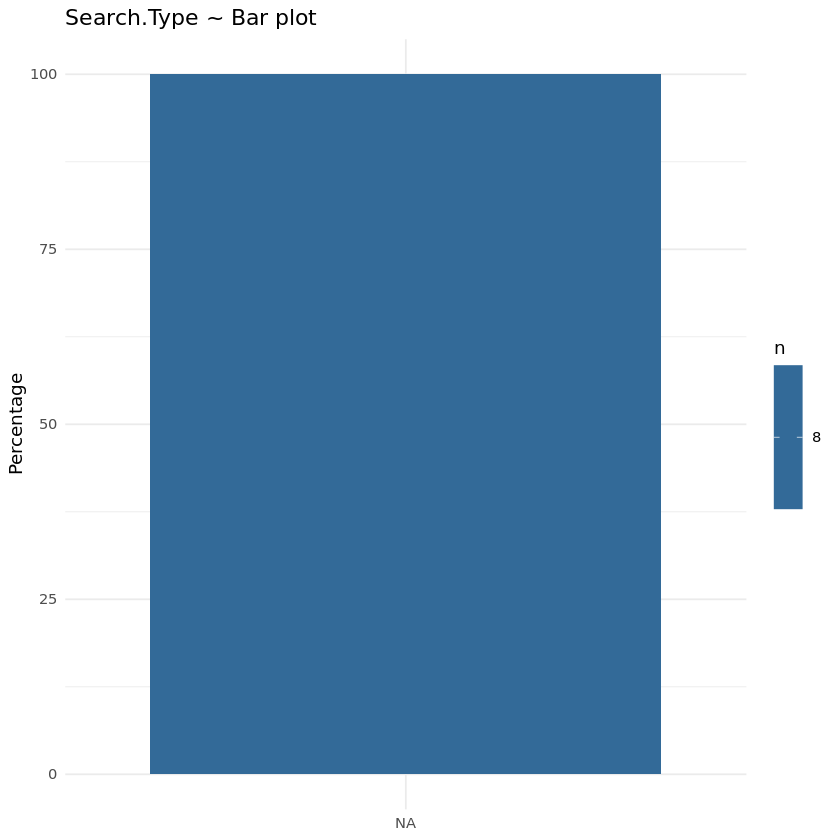

In [7]:
bar_plot_vector <- list()

for (i in 1:nrow(nominal_df)) {
    # Bar plot
    bar_plot_vector[[nominal_df$Column_name[i]]] <- generate_bar_plot(relis_data, nominal_df, i)
}

print(bar_plot_vector)

In [8]:
statistics_vector <- list()

# Initialize lists to store frequency tables and plots for continuous data
for (i in 1:nrow(continuous_df)) {
    # Calculate descriptive statistics
    statistics_vector[[continuous_df$Column_name[i]]] <- describe(beautify_data_desc_cont(relis_data, continuous_df, i))
}

print(statistics_vector)

$Targeted.year
     vars n    mean     sd median trimmed  mad min  max range  skew kurtosis
data    1 7 1724.57 760.47   2011 1724.57 1.48   0 2015  2015 -1.62      0.8
         se
data 287.43

$Publication.year
     vars n    mean   sd median trimmed mad  min  max range skew kurtosis   se
data    1 8 2016.75 1.16   2016 2016.75   0 2016 2019     3 0.89    -0.99 0.41



$Targeted.year


Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”



$Publication.year


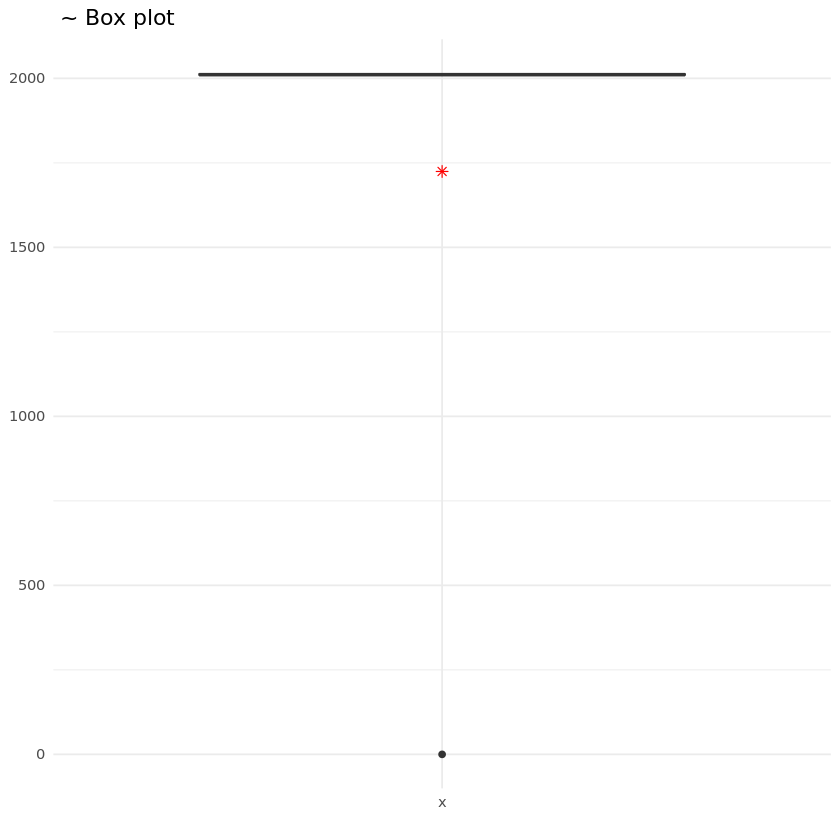

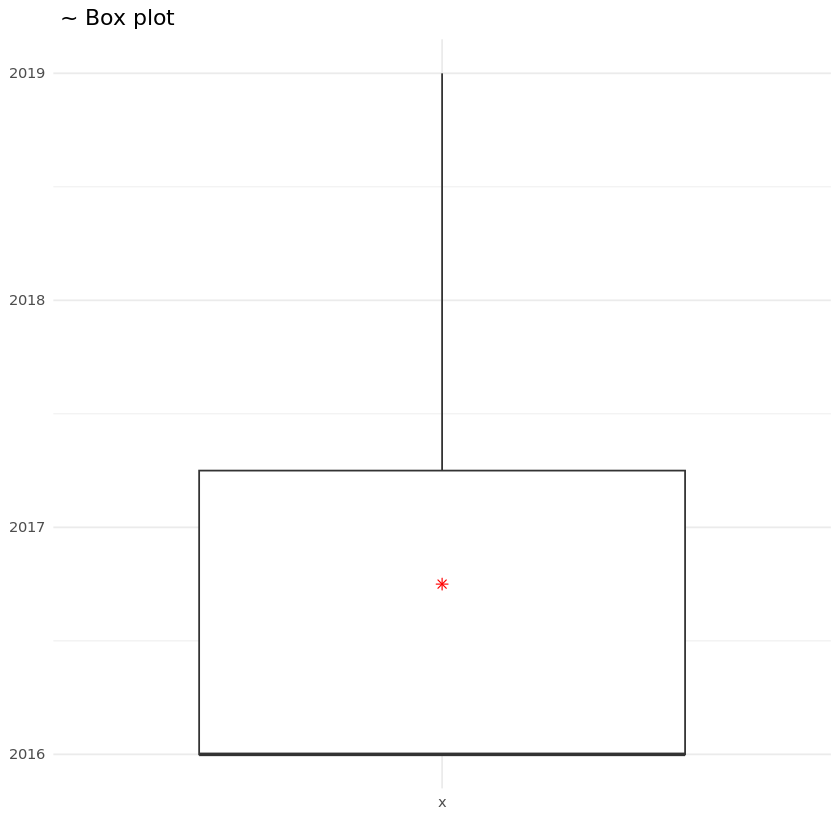

In [9]:
box_plot_vector <- list()

# Initialize lists to store frequency tables and plots for continuous data
for (i in 1:nrow(continuous_df)) {
    # Generate plots for each continuous variable
    box_plot_vector[[continuous_df$Column_name[i]]] <- generate_box_plot(relis_data, continuous_df, i)
}

print(box_plot_vector)

  nbr Key Title Publication.year Author.s Venue Source Search.Type Reviewer.s
1   1  NA    NA             2016       NA    NA     NA          NA         NA
2   2  NA    NA             2018       NA    NA     NA          NA         NA
3   3  NA    NA             2016       NA    NA     NA          NA         NA
4   4  NA    NA             2016       NA    NA     NA          NA         NA
5   5  NA    NA             2019       NA    NA     NA          NA         NA
6   6  NA    NA             2016       NA    NA     NA          NA         NA
7   7  NA    NA             2017       NA    NA     NA          NA         NA
8 943  NA    NA             2016       NA    NA     NA          NA         NA
            Transformation.name                  Domain Transformation.Language
1 Model-Driven Data Migration 2 Artificial Intelligence           ATL | Henshin
2                         Test1    Collaborative system                 Henshin
3                        testtt    Collaborative system   

Warning message:
“Removed 1 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”



$Publication.year


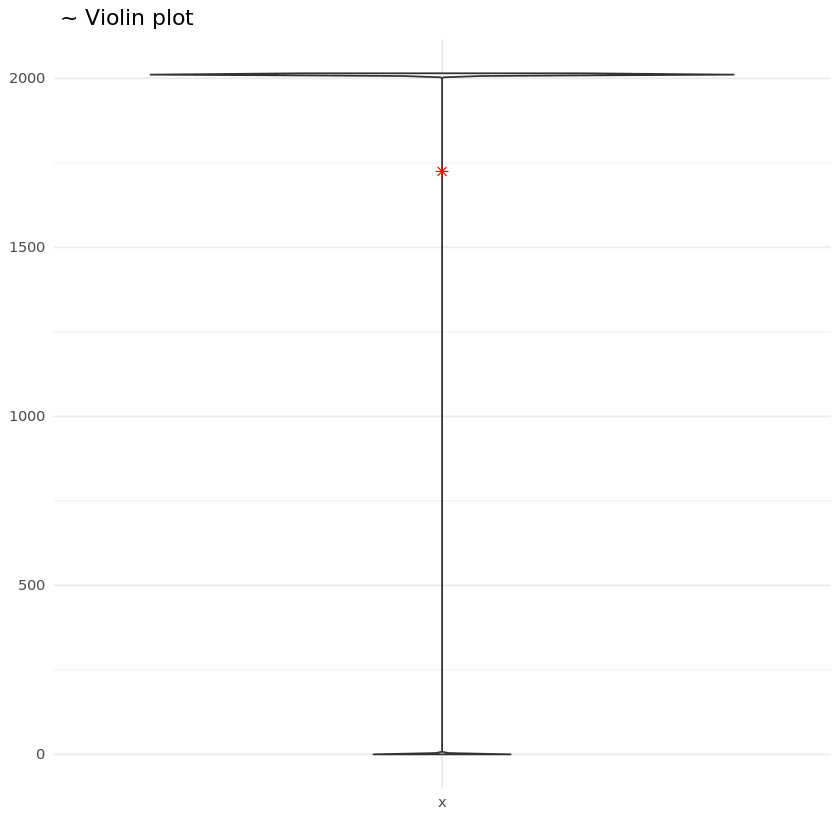

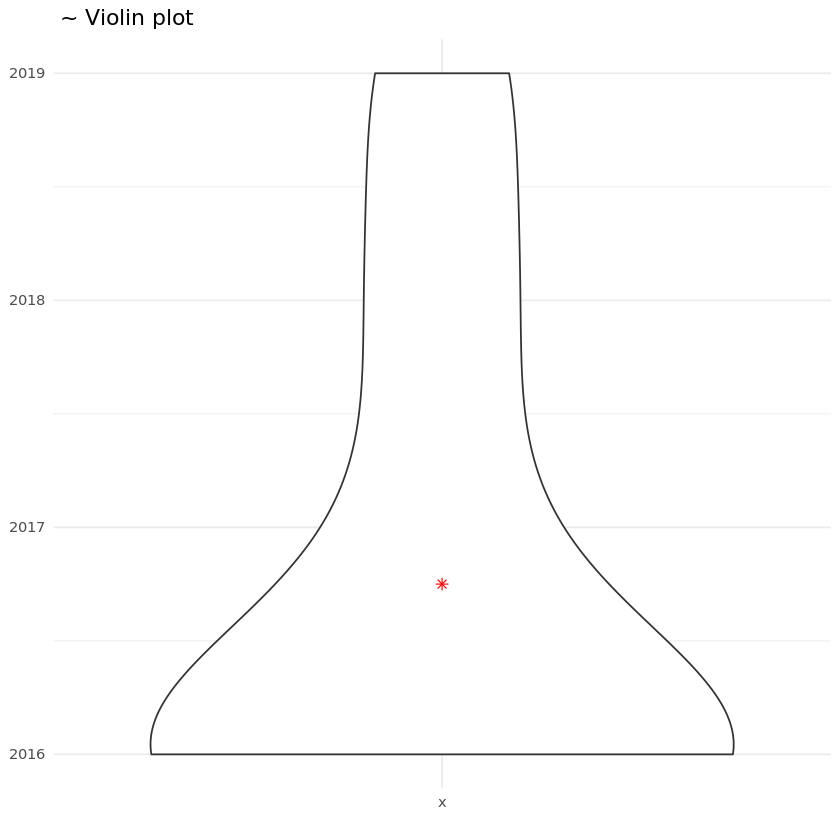

In [10]:
violin_plot_vector <- list()

# Initialize lists to store frequency tables and plots for continuous data
for (i in 1:nrow(continuous_df)) {
    violin_plot_vector[[continuous_df$Column_name[i]]] <- generate_violin_plot(relis_data, continuous_df, i)
}

print(violin_plot_vector)

<h4><u>EVOLUTION STATS</u></h4>

<h5 style="color:orange">Functions<h5>

In [11]:
# Available functions
# Function to extract current column and organize data
beautify_data_evo <- function(data, config_file, i) {
    table_to_add <- data.frame(data$Publication.year, data[[config_file$Column_name[i]]])
    colnames(table_to_add) <- c("Year", "Value")
    table_to_add <- subset(table_to_add, Value != "")

    table_to_add <- table_to_add %>%
        separate_rows(Value, sep = "\\s*\\|\\s*") %>%
        count(Year, Value, name = "Frequency")

    return(table_to_add)
}

# Function to generate distribution table
expand_data <- function(data, config_file, i) {
    table_to_add <- beautify_data_evo(data, config_file, i)

    y <- pivot_wider(table_to_add, names_from = "Value", values_from = "Frequency") %>%
        mutate_all(~ replace(., is.na(.), 0)) # Replace NA with 0

    return(y)
}

# Function to generate evolution plots
generate_evo_plot <- function(data, config_file, i) {
    table_to_add <- beautify_data_evo(data, config_file, i)

    shape_vector <- rep(1:6, length.out = length(unique(table_to_add$Value)))

    p <- ggplot(data = table_to_add, aes(x = Year, y = Frequency, color = Value, shape = Value, group = Value, linetype = Value)) +
        geom_line(stat = "identity", size = 1.1) +
        geom_point(size = 2) +
        scale_shape_manual(values = shape_vector) +
        labs(title = paste(config_file$Title[[i]], "~ Evolution plot"), x = "Year", y = "Frequency") +
        theme_minimal()

    return(p)
}

<h5 style="color:#F0F8FF">Execution<h5>

In [12]:
evo_distr_vector <- list()

for (i in 1:nrow(nominal_df)) {
    # Frequency table
    evo_distr_vector[[nominal_df$Column_name[i]]] <- expand_data(relis_data, nominal_df, i)
}

print(evo_distr_vector$Transformation.Language)

# A tibble: 4 × 5
   Year   ATL Henshin   QVT MoTiF
  <dbl> <dbl>   <dbl> <dbl> <dbl>
1  2016     2       2     1     0
2  2017     0       1     0     0
3  2018     0       1     0     0
4  2019     0       1     0     1


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


$Domain

$Transformation.Language


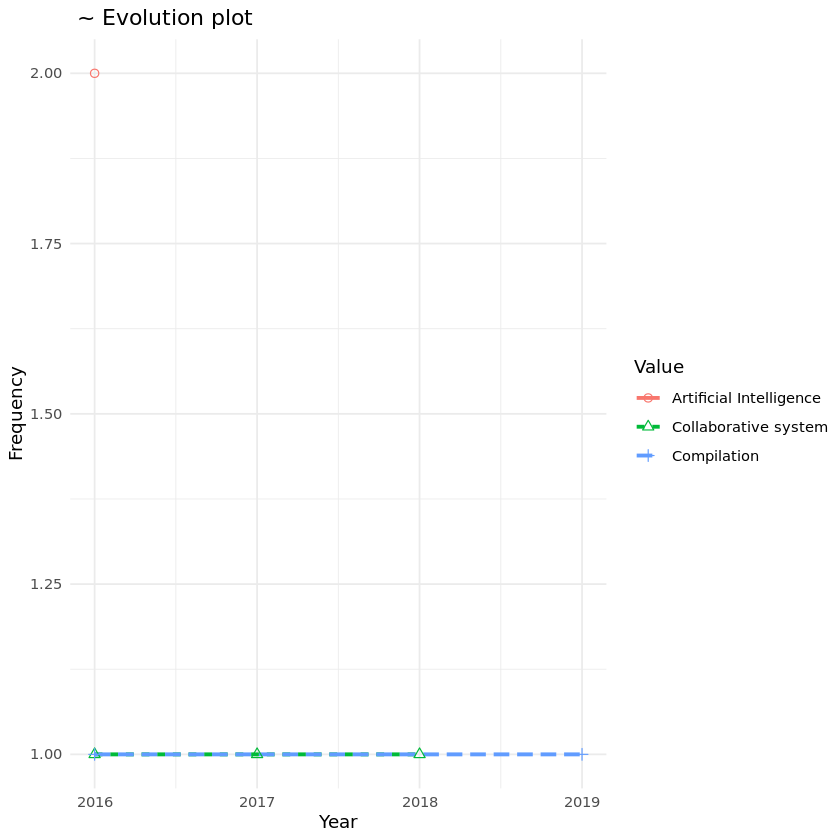


$Source.language


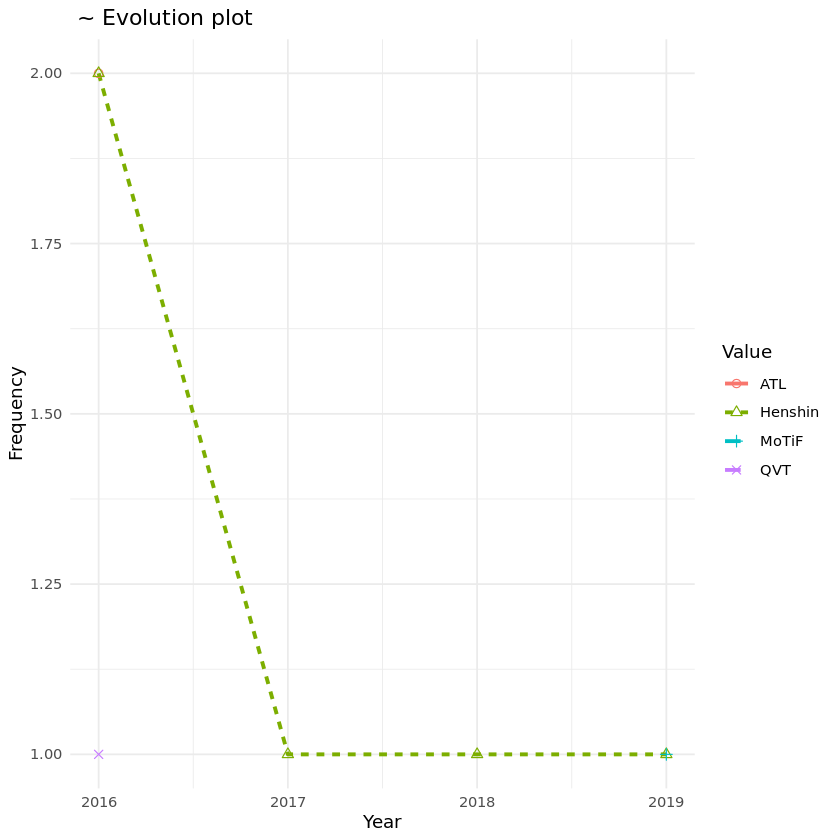


$Target.language


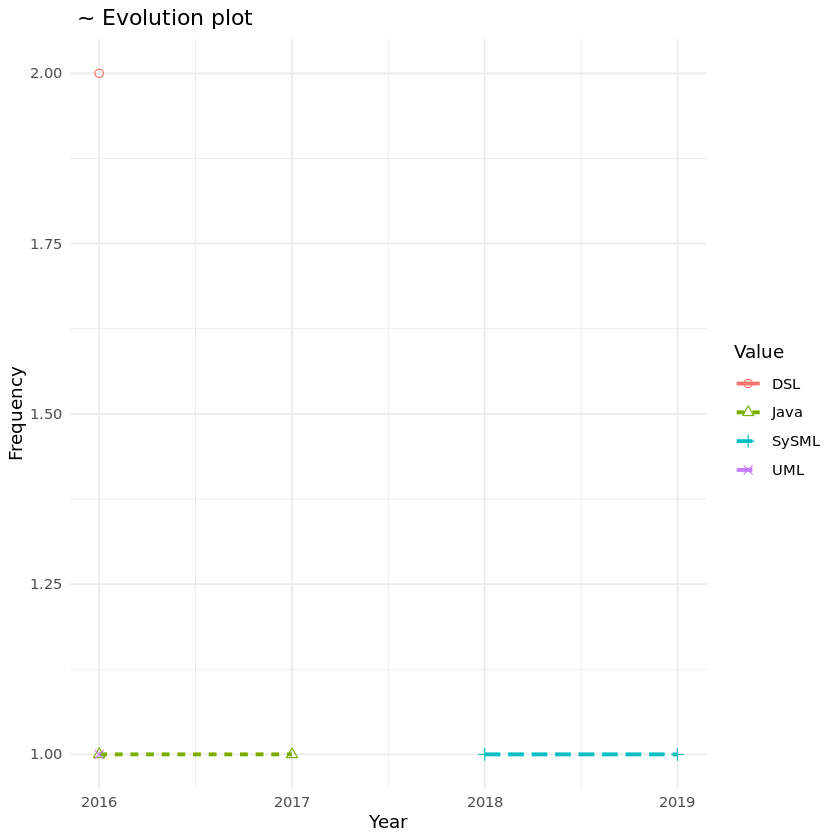


$Scope


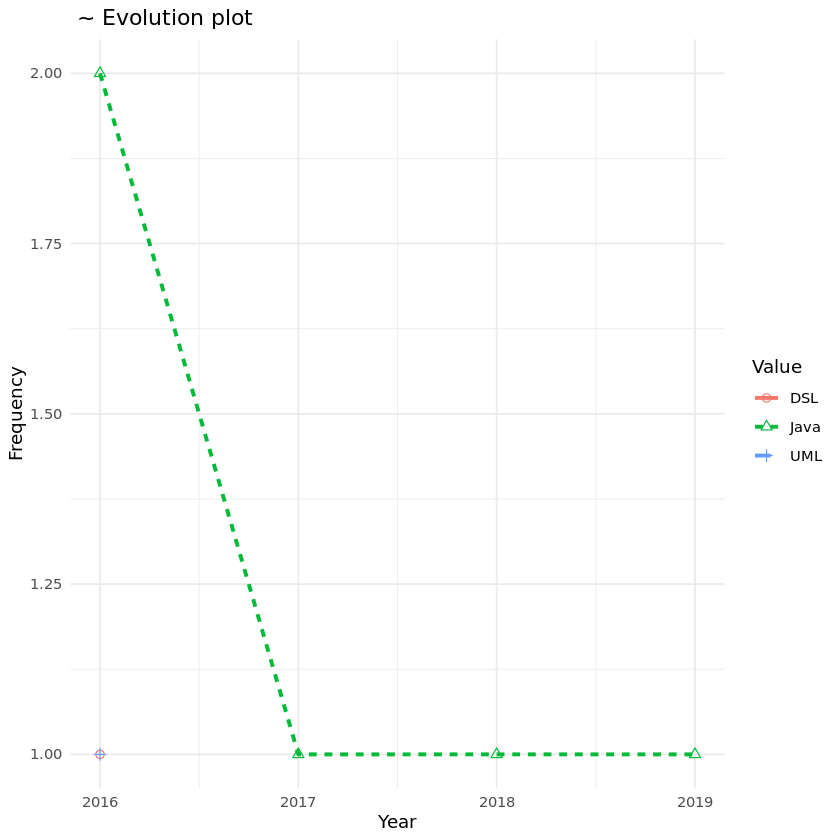


$Industrial


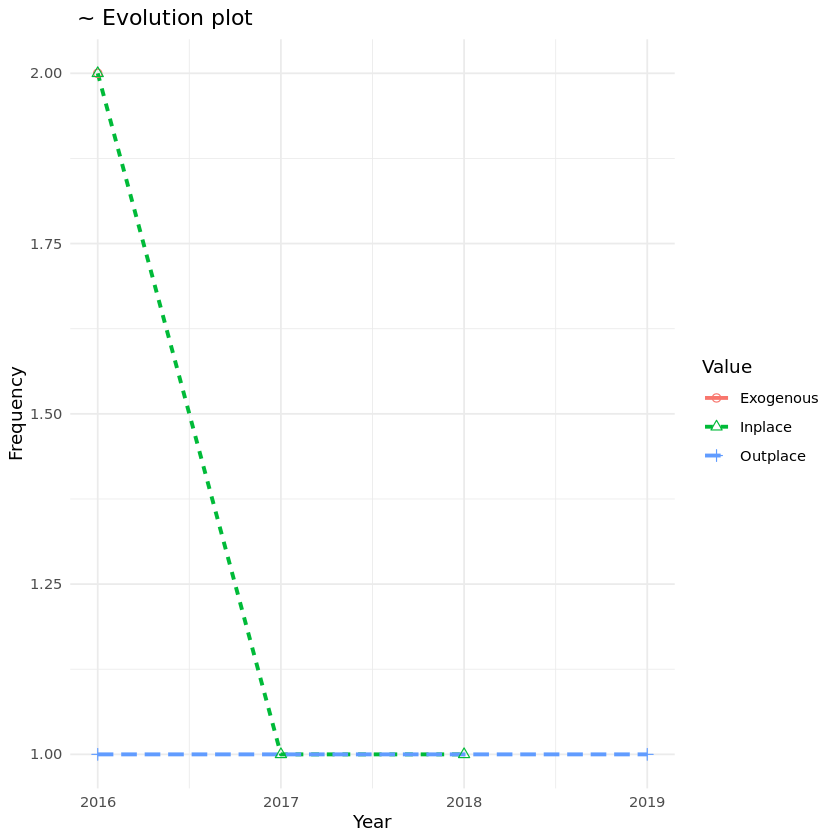


$Bidirectional


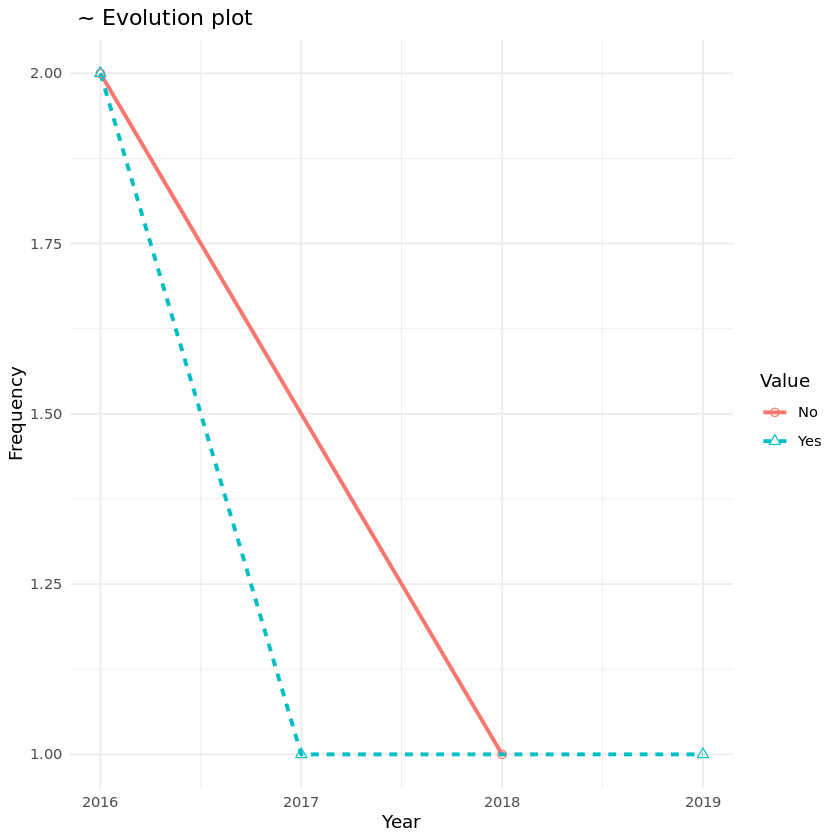


$Venue


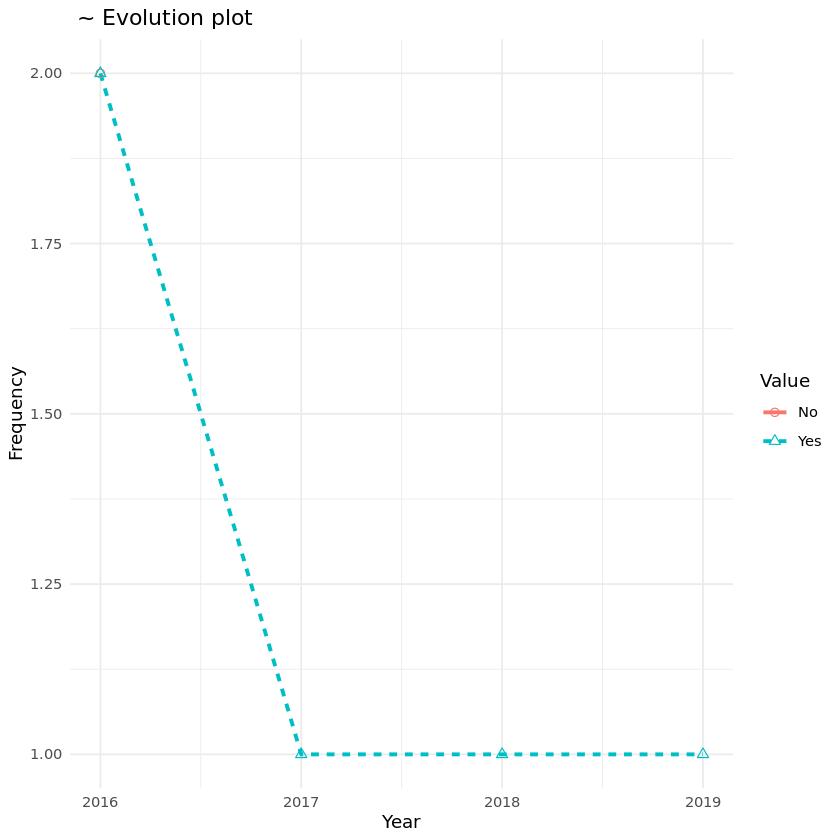


$Search.Type


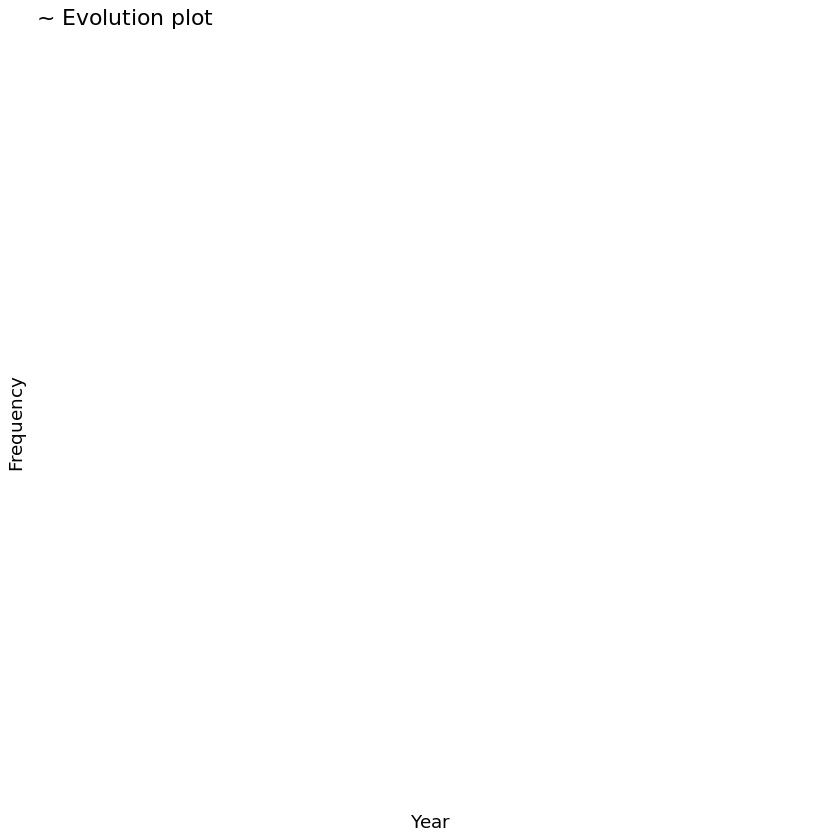

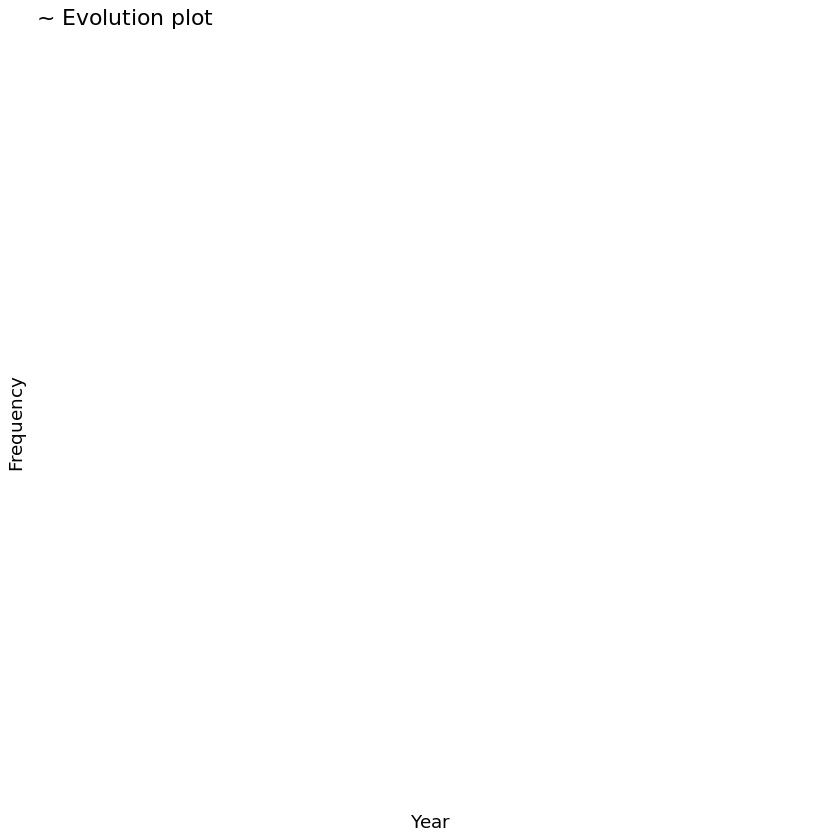

In [13]:
evolution_plot_vector <- list()

for (i in 1:nrow(nominal_df)) {
    # Evolution plots
    evolution_plot_vector[[nominal_df$Column_name[i]]] <- generate_evo_plot(relis_data, nominal_df, i)
}

print(evolution_plot_vector)

<h4><u>COMPARATIVE STATS</u></h4>

<h5 style="color:orange">Functions<h5>

In [14]:
# Available functions
# Function to subset required data
beautify_data <- function(data, config_file, i, j) {
    subset_data <- data[, c(config_file$Column_name[i], config_file$Column_name[j])]
    colnames(subset_data) <- c("variable_1", "variable_2")

    subset_data <- subset_data[subset_data$variable_1 != "" & subset_data$variable_2 != "", ]

    subset_data <- subset_data %>%
        separate_rows(variable_1, sep = "\\s*\\|\\s*") %>%
        separate_rows(variable_2, sep = "\\s*\\|\\s*") %>%
        count(variable_1, variable_2, name = "Freq")

    return(subset_data)
}

# Function to generate stacked bar plots
generate_stacked_bar_plot <- function(data, config_file, i, j) {
    subset_data <- beautify_data(data, config_file, i, j)

    p <- ggplot(subset_data, aes(x = variable_1, y = Freq, fill = variable_2)) +
        geom_bar(stat = "identity") +
        labs(
            title = paste(config_file$Title[i], "and", config_file$Title[j], "~ Stacked bar plot"),
            x = config_file$Title[i], y = "Frequency", fill = config_file$Title[j]
        ) +
        theme_minimal()

    return(p)
}

# Function to generate grouped bar plots
generate_grouped_bar_plot <- function(data, config_file, i, j) {
    subset_data <- beautify_data(data, config_file, i, j)

    p <- ggplot(subset_data, aes(x = variable_1, y = Freq, fill = variable_2)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(
            title = paste(config_file$Title[i], "and", config_file$Title[j], "~ Grouped bar plot"),
            x = config_file$Title[i], y = "Frequency", fill = config_file$Title[j]
        ) +
        theme_minimal()

    return(p)
}

# Function to generate bubble charts
generate_bubble_chart <- function(data, config_file, i, j) {
    subset_data <- beautify_data(data, config_file, i, j)

    p <- ggplot(subset_data, aes(x = variable_1, y = variable_2, size = Freq)) +
        geom_point() +
        labs(
            title = paste(config_file$Title[i], "and", config_file$Title[j], "~ Bubble Chart"),
            x = config_file$Title[i], y = config_file$Title[j], size = "Frequency"
        ) +
        theme_minimal()

    return(p)
}



# Function to conduct Fisher's exact test
fisher_exact_test <- function(data, config_file, i, j) {
    subset_data <- beautify_data(data, config_file, i, j)
    if (nrow(subset_data) == 1 && is.na(subset_data$variable_1) && is.na(subset_data$variable_2)) {
        return(NA)
    }

    contingency_table <- xtabs(Freq ~ variable_1 + variable_2, data = subset_data)

    fisher_exact_test_result <- fisher.test(contingency_table, simulate.p.value = TRUE)

    return(fisher_exact_test_result)
}

# Function to conduct Shapiro Wilk's test
shapiro_wilk_test <- function(data, config_file, i) {
    subset_data <- data[[config_file$Column_name[i]]]
    shapiro_result <- shapiro.test(subset_data)

    return(shapiro_result)
}

# Function to conduct Spearman's correlation test
spearman_cor_test <- function(data, config_file, i, j) {
    column_1 <- data[[config_file$Column_name[i]]]
    column_2 <- data[[config_file$Column_name[j]]]

    spearman_result <- cor.test(column_1, column_2, method = "spearman", exact = FALSE)

    return(spearman_result)
}

# Function to conduct Pearson's correlation test
pearson_cor_test <- function(data, config_file, i, j) {
    column_1 <- data[[config_file$Column_name[i]]]
    column_2 <- data[[config_file$Column_name[j]]]

    pearson_result <- cor.test(column_1, column_2, method = "pearson")

    return(pearson_result)
}

<h5 style="color:#F0F8FF">Execution<h5>

In [15]:
comp_distr_vector <- list()

for (i in 1:nrow(nominal_df)) {
    comp_distr_vector[[nominal_df$Column_name[i]]] <- list()

    for (j in 1:nrow(nominal_df)) {
        if (j != i) {
            # print(beautify_data(relis_data, nominal_df, i, j))
            comp_distr_vector[[nominal_df$Column_name[i]]][[nominal_df$Column_name[j]]] <- beautify_data(relis_data, nominal_df, i, j)
        }
    }
}
print(comp_distr_vector$Domain$Transformation.Language)

# A tibble: 7 × 3
  variable_1              variable_2  Freq
  <chr>                   <chr>      <int>
1 Artificial Intelligence ATL            1
2 Artificial Intelligence Henshin        2
3 Collaborative system    Henshin        2
4 Collaborative system    QVT            1
5 Compilation             ATL            1
6 Compilation             Henshin        1
7 Compilation             MoTiF          1


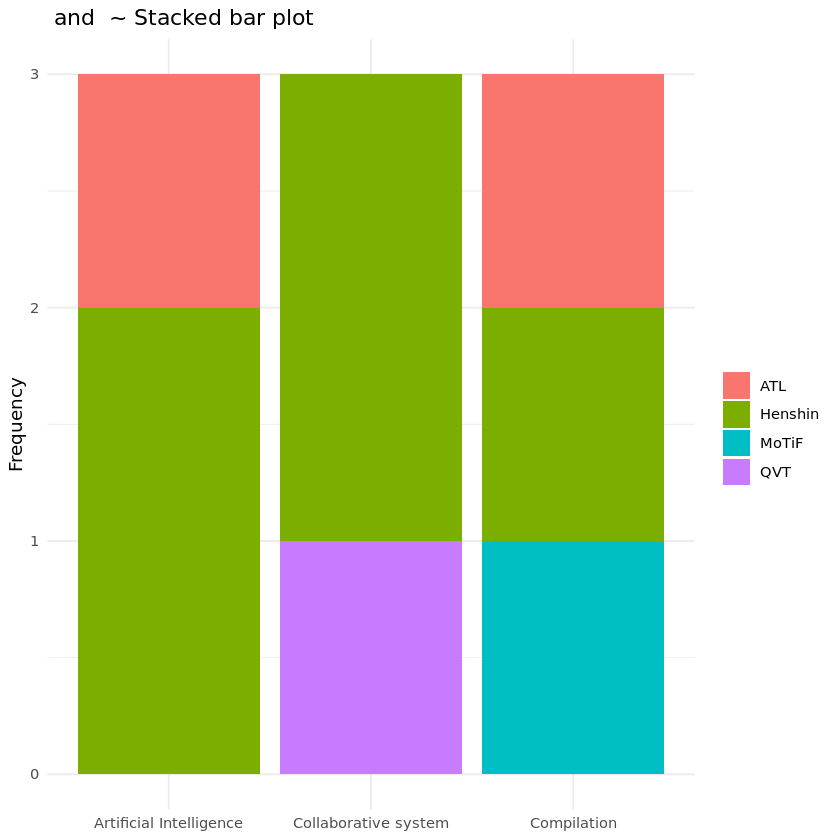

In [17]:
stacked_bar_plot_vector <- list()

for (i in 1:nrow(nominal_df)) {
    stacked_bar_plot_vector[[nominal_df$Column_name[i]]] <- list()

    for (j in 1:nrow(nominal_df)) {
        if (j != i) {
            # print(beautify_data(relis_data, nominal_df, i, j))
            stacked_bar_plot_vector[[nominal_df$Column_name[i]]][[nominal_df$Column_name[j]]] <- generate_stacked_bar_plot(relis_data, nominal_df, i, j)
        }
    }
}
print(stacked_bar_plot_vector$Domain$Transformation.Language)

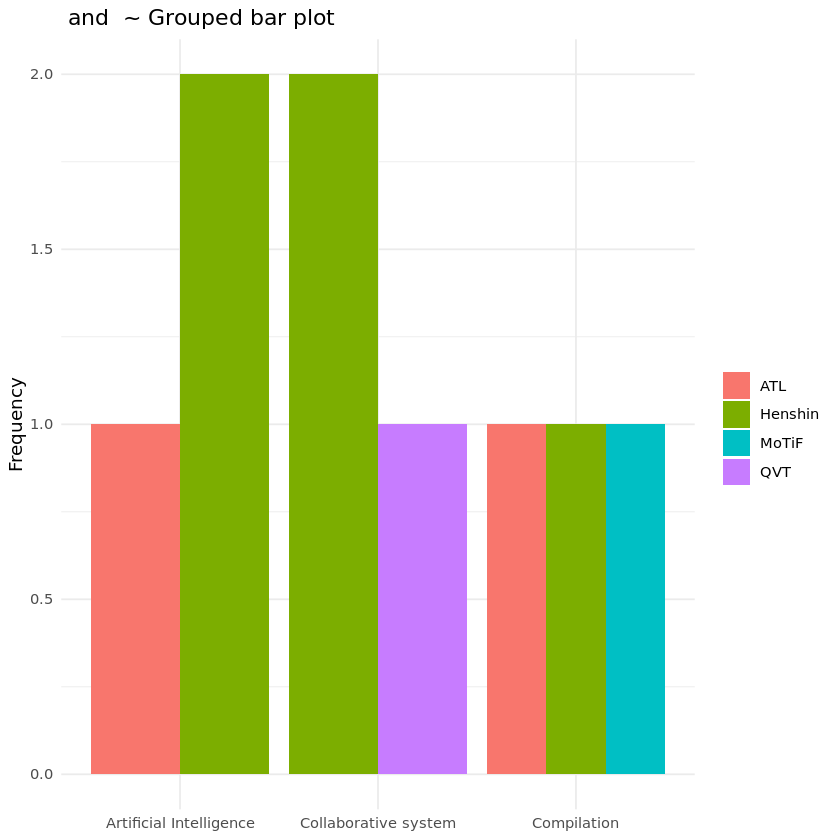

In [18]:
grouped_bar_plot_vector <- list()

for (i in 1:nrow(nominal_df)) {
    grouped_bar_plot_vector[[nominal_df$Column_name[i]]] <- list()

    for (j in 1:nrow(nominal_df)) {
        if (j != i) {
            # print(beautify_data(relis_data, nominal_df, i, j))
            grouped_bar_plot_vector[[nominal_df$Column_name[i]]][[nominal_df$Column_name[j]]] <- generate_grouped_bar_plot(relis_data, nominal_df, i, j)
        }
    }
}
print(grouped_bar_plot_vector$Domain$Transformation.Language)

In [ ]:
bubble_chart_vector <- list()

for (i in 1:nrow(nominal_df)) {
    bubble_chart_vector[[nominal_df$Column_name[i]]] <- list()

    for (j in 1:nrow(nominal_df)) {
        if (j != i) {
            # print(beautify_data(relis_data, nominal_df, i, j))
            bubble_chart_vector[[nominal_df$Column_name[i]]][[nominal_df$Column_name[j]]] <- generate_bubble_chart(relis_data, nominal_df, i, j)
        }
    }
}
print(bubble_chart_vector)

In [ ]:
fisher_exact_test_vector <- list()

for (i in 1:nrow(nominal_df)) {
    fisher_exact_test_vector[[nominal_df$Column_name[i]]] <- list()

    for (j in 1:nrow(nominal_df)) {
        if (j != i) {
            # print(beautify_data(relis_data, nominal_df, i, j))
            fisher_exact_test_vector[[nominal_df$Column_name[i]]][[nominal_df$Column_name[j]]] <- fisher_exact_test(relis_data, nominal_df, i, j)
        }
    }
}
print(fisher_exact_test_vector$Domain$Target.language)

In [ ]:
shapiro_wilk_test_vector <- list()

for (i in 1:nrow(continuous_df)) {
    shapiro_wilk_test_vector[[continuous_df$Column_name[i]]] <- shapiro_wilk_test(relis_data, continuous_df, i)
}

print(shapiro_wilk_test_vector)

<h4>Has dependency of the shapiro_wilk_test</h4>

In [ ]:
pearson_cor_test_vector <- list()
spearman_cor_test_vector <- list()

for (i in 1:nrow(continuous_df)) {
    spearman_cor_test_vector[[continuous_df$Column_name[i]]] <- list()
    pearson_cor_test_vector[[continuous_df$Column_name[i]]] <- list()

    for (j in 1:nrow(continuous_df)) {
        if (j != i) {
            if (shapiro_wilk_test_vector[[continuous_df$Column_name[i]]]$p.value > 0.05 && shapiro_wilk_test_vector[[continuous_df$Column_name[j]]]$p.value > 0.05) {
                pearson_cor_test_vector[[continuous_df$Column_name[i]]][[continuous_df$Column_name[j]]] <- pearson_cor_test(relis_data, continuous_df, i, j)
            } else {
                spearman_cor_test_vector[[continuous_df$Column_name[i]]][[continuous_df$Column_name[j]]] <- spearman_cor_test(relis_data, continuous_df, i, j)
            }
        }
    }
}

In [ ]:
print(pearson_cor_test_vector)

In [ ]:
print(spearman_cor_test_vector)